In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

#

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df=pd.read_csv("spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
label,0
text,0
label_num,0


# **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


Now I am going to import label encoder in order to convert spam and ham values into 0 and 1

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
df["label"]=le.fit_transform(df["label"])
df["label"].value_counts()

,count
label,
0,3672
1,1499


In [ ]:
#Check for duuplicate values
df.duplicated().sum()

178

In [ ]:
#Remove duplicate values
df=df.drop_duplicates(keep="first")

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(4993, 3)

# **EDA** (Exploratory Data Analysis)

In [ ]:
df["label"].value_counts()

,count
label,
0,3531
1,1462


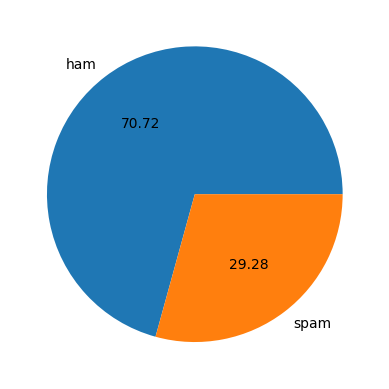

In [ ]:
plt.pie(df["label"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

By above observation we can see that the data is unbalanced

In [ ]:
import nltk

In [ ]:
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df["num_characters"]=df["text"].apply(len) #It will count number of length of characters in each message

In [ ]:
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x))) #It will count number of words in each message

In [ ]:
df.head()

,label,text,label_num,num_characters,num_words
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,1,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [ ]:
df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x))) #sent_tokenize breaks message on basis of sentences

In [ ]:
df.describe()

,label,label_num,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000
mean,0.292810,0.292810,1069.426397,233.678149,13.386942
std,0.455098,0.455098,1547.863387,340.702932,27.959959
min,0.000000,0.000000,11.000000,2.000000,1.000000
25%,0.000000,0.000000,256.000000,55.000000,4.000000
50%,0.000000,0.000000,557.000000,125.000000,7.000000
75%,1.000000,1.000000,1262.000000,288.000000,15.000000
max,1.000000,1.000000,32258.000000,8863.000000,1204.000000


In [ ]:
#spam
df[df['label']==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [ ]:
#ham
df[df["label"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

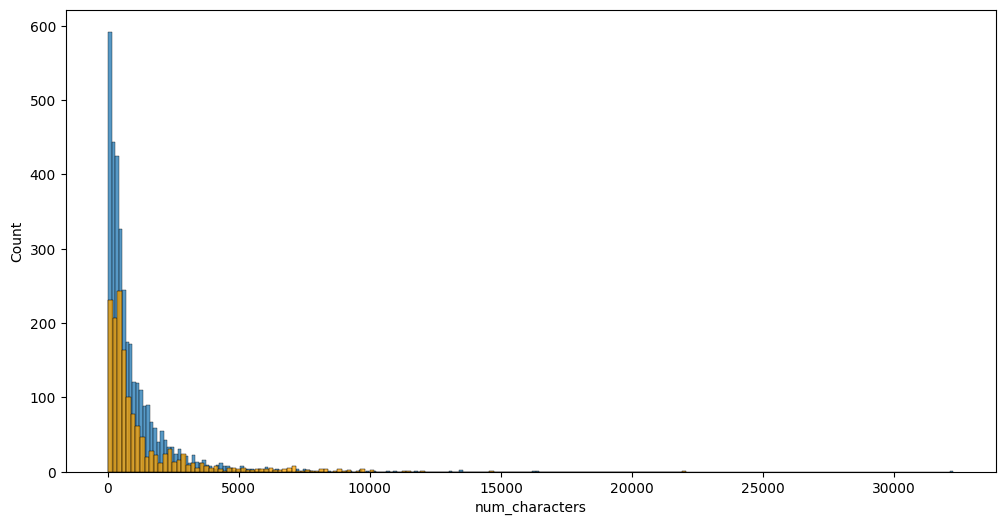

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["label"]==0]["num_characters"])
sns.histplot(df[df["label"]==1]["num_characters"],color="orange")

<Axes: xlabel='num_words', ylabel='Count'>

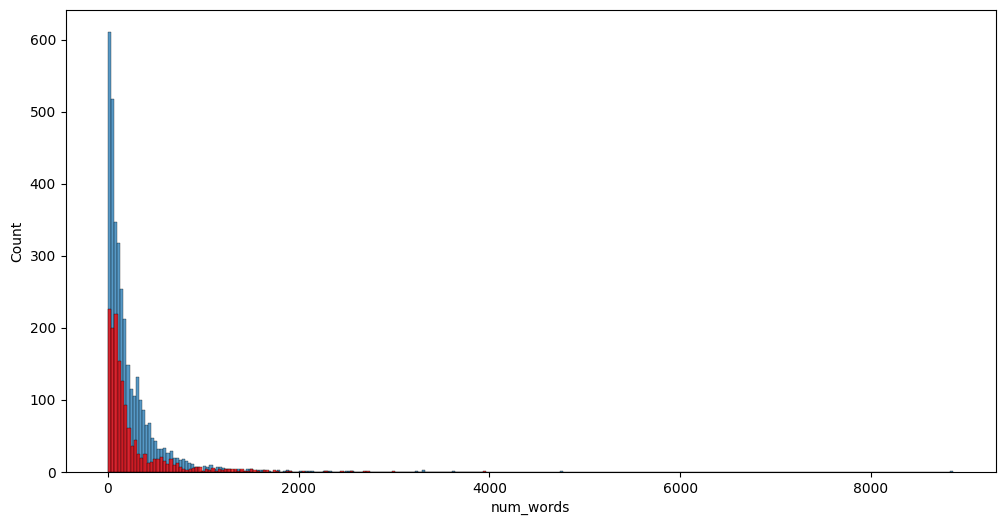

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["label"]==0]["num_words"])
sns.histplot(df[df["label"]==1]["num_words"],color="red")

In [ ]:
#sns.heatmap(df["label"].corr(),annot=True)

# **Data Preprocessing**

->Lower Case

->Tokenization

->Removing Special Characters

->Removing stop words and punctuation(Stop words have contribution in sentence making but they have no contibution in meaning)

->Stemming

In [ ]:
from nltk.corpus import stopwords
stopwords.words("english")


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem

<bound method PorterStemmer.stem of <PorterStemmer>>

In [ ]:
def transform_text(text):
  text=text.lower() #Lower Case
  text=nltk.word_tokenize(text) #Tokenization
  y=[] #Removing Special Characters
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()
  for i in text: #Removing stop words and punctuation
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i)) #Stemming


  return " ".join(y) #Return in the form of String

In [ ]:
transform_text("I am good girl")

'good girl'

In [ ]:
df["transformed_text"]=df["text"].apply(transform_text)

# **Word Cloud Checking**

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white") #


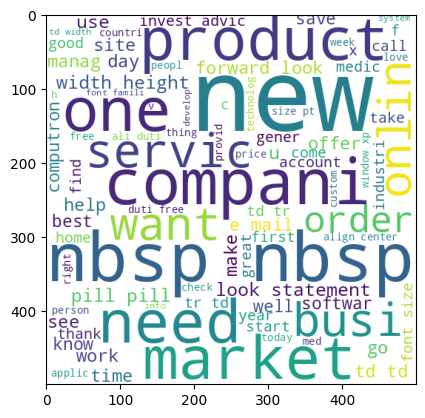

In [ ]:
spam_words=wc.generate(df[df["label"]==1]["transformed_text"].str.cat(sep=""))
plt.imshow(spam_words)

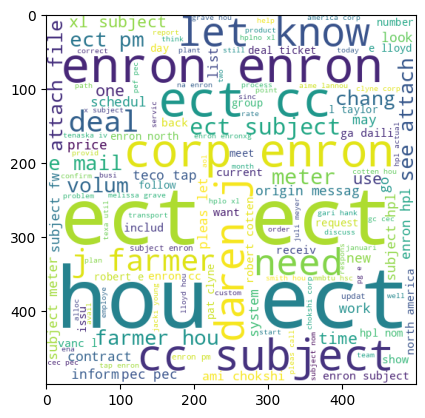

In [ ]:
ham_words=wc.generate(df[df["label"]==0]["transformed_text"].str.cat(sep=" "))
plt.imshow(ham_words)

In [ ]:
spam_corpous=[]   # it will split words in spam messages and will append it to a list
for msg in df[df['label']==1]["transformed_text"].tolist():
  for words in msg.split():
    spam_corpous.append(words)

In [ ]:
#from collections import Counter    #It will create a dictionary
#sns.barplot(pd.DataFrame(Counter(spam_corpous).most_common(10))[0],pd.DataFrame(Counter(spam_corpous).most_common(10))[1])
#plt.xticks(rotation="vertical")
#plt.show()

# **Model Building** (It is general prespective that Naive base works better on Textual Data)

->Convert into vector

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
X=cv.fit_transform(df["transformed_text"]).toarray() #fit_transform gives sparse array so convert it into dense array

In [ ]:
Y=df["label"].values
Y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb=GaussianNB()


In [ ]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))


0.9519519519519519
[[683  14]
 [ 34 268]]
0.950354609929078


In [ ]:
#mnb.fit(X_train,Y_train)
#Y_pred1=mnb.predict(X_test)
#print(accuracy_score(Y_test,Y_pred1))
#print(confusion_matrix(Y_test,Y_pred1))
#print(precision_score(Y_test,Y_pred1))

In [ ]:
#bnb.fit(X_train,Y_train)
#Y_pred1=bnb.predict(X_test)
#print(accuracy_score(Y_test,Y_pred1))
#print(precision_score(Y_test,Y_pred1))

In [ ]:
#I have  choosen gnb
import pickle
pickle.dump(cv,open("countvectorizer.pkl","wb"))
pickle.dump(gnb,open("model.pkl","wb"))
#